In [1]:
import pandas as pd

In [2]:
df_feature_x = pd.read_csv("preprocess.csv", index_col=0)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsExp,YearsProExp,NumSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,4,4
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12,5,12
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15,6,7
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9,6,13
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,2,5
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26,18,17
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14,5,4
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39,21,3
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20,16,6
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4,2,18


In [3]:
df_feature_y = pd.read_csv("label.csv", index_col=0)
df_feature_y.head(10)

,Employed
0,0.0
1,1.0
2,0.0
3,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0
10,1.0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(df_feature_x, df_feature_y, test_size=0.2, random_state=1)


print(f"Data before splitting: {len(df_feature_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 66965
Train data: 53572
Validation data: 13393


In [5]:
EPOCH = 20
LEARNING_RATE = 1e-3

In [6]:
import tensorflow as tf
len_feature = len(df_feature_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=EPOCH, validation_data=(X_valid, Y_valid))

2023-11-12 04:51:29.059753: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 04:51:29.059832: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 04:51:29.059885: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 04:51:29.069673: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


2023-11-12 04:51:31.155082: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 04:51:31.192285: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 04:51:31.192346: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 04:51:31.196374: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-12 04:51:31.196440: I tensorflow/compile

1675/1675 [==============================] - 10s 5ms/step - loss: 0.5149 - accuracy: 0.7613 - val_loss: 0.4567 - val_accuracy: 0.7823
Epoch 2/20
1675/1675 [==============================] - 9s 6ms/step - loss: 0.4637 - accuracy: 0.7739 - val_loss: 0.4844 - val_accuracy: 0.7682
Epoch 3/20
1675/1675 [==============================] - 9s 5ms/step - loss: 0.4614 - accuracy: 0.7736 - val_loss: 0.4652 - val_accuracy: 0.7734
Epoch 4/20
1675/1675 [==============================] - 9s 6ms/step - loss: 0.4597 - accuracy: 0.7752 - val_loss: 0.4538 - val_accuracy: 0.7821
Epoch 5/20
1675/1675 [==============================] - 10s 6ms/step - loss: 0.4589 - accuracy: 0.7736 - val_loss: 0.4518 - val_accuracy: 0.7836
Epoch 6/20
1675/1675 [==============================] - 9s 6ms/step - loss: 0.4581 - accuracy: 0.7754 - val_loss: 0.4536 - val_accuracy: 0.7822
Epoch 7/20
1675/1675 [==============================] - 9s 6ms/step - loss: 0.4583 - accuracy: 0.7756 - val_loss: 0.4528 - val_accuracy: 0.7821
E

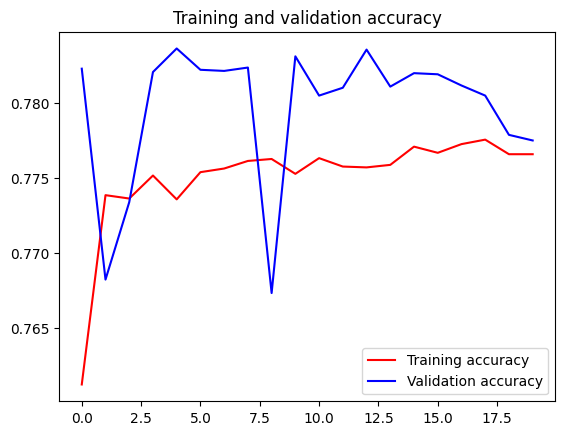

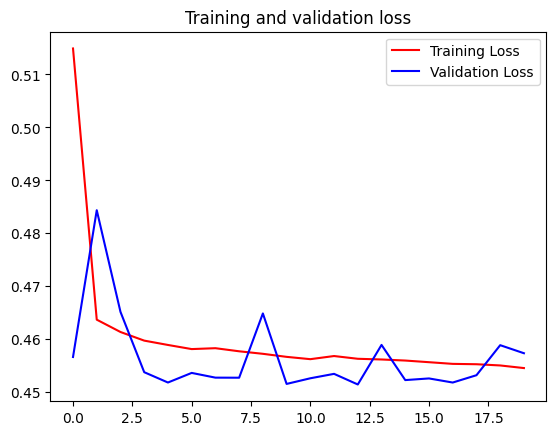

In [7]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
model.predict([[1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.72,-0.84,-0.925234]])

1/1 [==============================] - 0s 73ms/step


array([[9.9997151e-01, 2.8525641e-05]], dtype=float32)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 394 (1.54 KB)
Trainable params: 394 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
'''saved_model = "mdl_wo_std/model_without_std.h5"
model.save(saved_model)'''

'saved_model = "mdl_wo_std/model_without_std.h5"\nmodel.save(saved_model)'

In [11]:
'''!tensorflowjs_converter --input_format=keras {saved_model} ./mdl_wo_std'''

'!tensorflowjs_converter --input_format=keras {saved_model} ./mdl_wo_std'

# Cari model TF.JS di folder mdl_wo_std

In [12]:
import tempfile
import os
MODEL_DIR = tempfile.gettempdir()

print(MODEL_DIR)

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

print(export_path)

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

/tmp
/tmp/2
INFO:tensorflow:Assets written to: /tmp/2/assets


INFO:tensorflow:Assets written to: /tmp/2/assets



export_path = /tmp/2
total 120
drwxr-xr-x 2 abayup14 abayup14  4096 Nov 12 04:54 assets
-rw-r--r-- 1 abayup14 abayup14    56 Nov 12 04:54 fingerprint.pb
-rw-r--r-- 1 abayup14 abayup14  8698 Nov 12 04:54 keras_metadata.pb
-rw-r--r-- 1 abayup14 abayup14 94807 Nov 12 04:54 saved_model.pb
drwxr-xr-x 2 abayup14 abayup14  4096 Nov 12 04:54 variables


In [13]:
!saved_model_cli show --dir {export_path} --all

2023-11-12 04:54:36.982934: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 04:54:36.982997: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 04:54:36.983037: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
    

In [14]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [15]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8502 \
  --model_name=model_wo_std \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [16]:
!tail server.log

In [18]:
import numpy as np
import json
xs = np.array([[1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.14,0.08,0.037383177570093455], [0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.8,0.6,0.018691588785046728]])
data = json.dumps({"signature_name": "serving_default", "instances": xs.tolist()})
print(data)

{"signature_name": "serving_default", "instances": [[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.14, 0.08, 0.037383177570093455], [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.8, 0.6, 0.018691588785046728]]}


In [22]:
# if this cell fails execution because of an "...Failed to establish a new connection..." error,
# try replacing in the link below 'localhost' with '127.0.0.1'
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://127.0.0.1:8502/v2/models/model_wo_std:predict', data=data, headers=headers)

print(json_response.text)

<HTML><HEAD>
<TITLE>404 Not Found</TITLE>
</HEAD><BODY>
<H1>Not Found</H1>
</BODY></HTML>



In [ ]:
predictions = json.loads(json_response.text)['predictions']
print(predictions)